<a href="https://colab.research.google.com/github/willkakuta/Exercicios_Estatistica_Inferencial/blob/main/Exerc%C3%ADcio_Estat%C3%ADstica_Inferencial_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import e Conhecendo os dados

In [4]:
# Importação das bibliotecas
from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [5]:
# Leitura e ajuste dos dados
df = pd.read_csv('Walmart.csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# Preview da qualidade dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB




Você precisa avaliar a performance global das vendas semanais das lojas do Wallmart. Porém, o processo de estração de dados é devagar e custoso, por isso não seria possível recolher todas as vendas semanais do ano para fazer uma estimativa com precisão de 100%. A única saída é realizar uma amostragem dos dados de uma loja e em cima disso calcular o intervalo de confiança das vendas para que os superioes tenham uma noção da média das vendas da loja.

Pratique os conceitos de amostragem vistos na revisão dentro do dataset e ao final, calcule o intervalo de confiança para uma amostra de 25 e outra de 50 das vendas semanais da loja 20. O valor encontrado está dentro da média populacional da loja 20?

#**Etapa 1**



Nessa etapa iremos importar os dados e bibliotecas e verificar as vendas por loja


1.  Importar as bibliotecas e os dados
2.  Analisar os dados
3.  Verifique as vendas semanais por loja
4. Verifique se as vendas em período de feriado tem uma variação maior








#**Etapa 2**#

Nessa etapa iremos verificar os tipos de amostragem



1. Verifique as amostras (Simples, sistemática, estratificada e clusterizada)




#**Etapa 3 (PLUS)**#

Vamos analisar os dados das lojas conforme solicitado acima



1. Verificando as 20 lojas conforme solicitado utilizando distribuição normal

2. Filtrando o dataset e plotando seu histograma

3. Realizando o teste com amostragem aleatória simples com 25 amostras
4. Verificando a média da população
5. Visualizando a distruibuição por dados com ele são

6. Visualizando a distribuição dos dados aplicando o teorema do limite central

7. Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

8. Verificando a média da população



# Etapa 01



## População

In [7]:
# Todos os dados possíveis
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


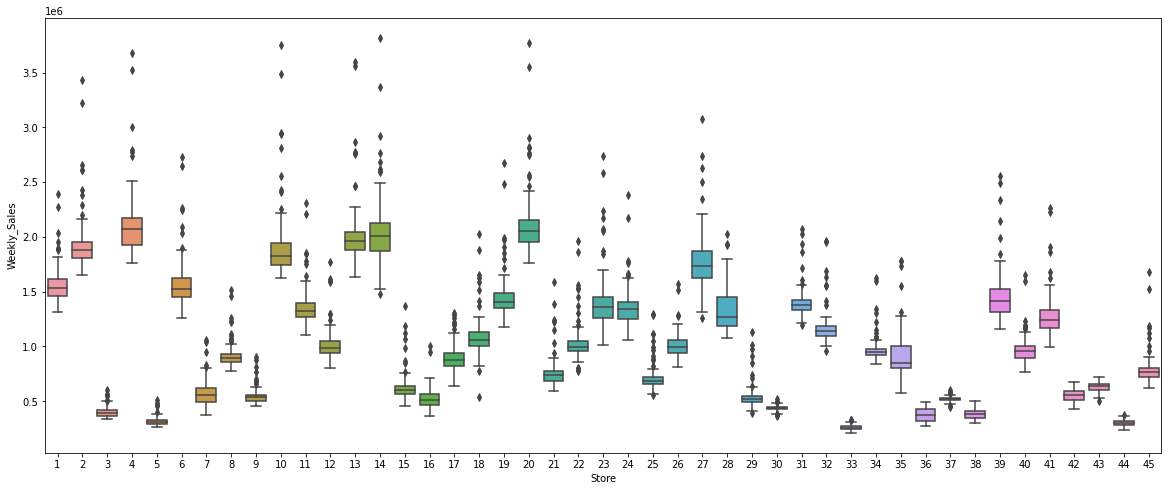

In [8]:
# Boxplot das vendas semanais por loja
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df,x='Store', y='Weekly_Sales')

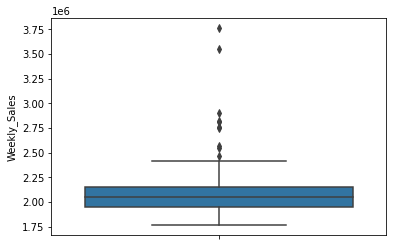

In [9]:
# Distribuição das vendas semanais da loja 20
store20 = df[df['Store']==20]

sns.boxplot(data=store20, y='Weekly_Sales')

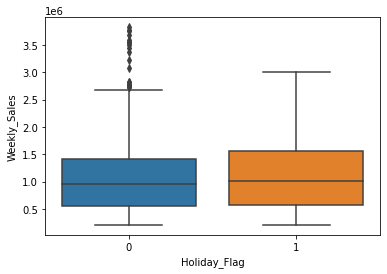

In [10]:
# Verificando se as vendas em período de feriado tem uma variação maior
sns.boxplot(data=df,x='Holiday_Flag', y='Weekly_Sales')

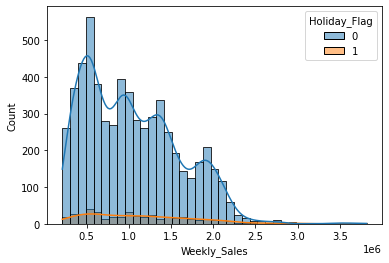

In [11]:
sns.histplot(data=df,x='Weekly_Sales',hue = 'Holiday_Flag',kde=True)

# Etapa 02

## Amostragem Simples 

In [19]:
# Amostrando simples usando o random_state
sample_simp = df.sample(10,random_state= 0)
sample_simp

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3949,28,14-10-2011,1220984.94,0,67.31,3.805,129.770645,12.890
4555,32,08-06-2012,1246322.44,0,71.14,3.741,197.655186,8.090
2235,16,28-10-2011,505918.21,0,41.97,3.550,195.331898,6.232
5204,37,04-03-2011,527572.25,0,64.55,3.288,212.576205,8.395
3524,25,11-11-2011,719235.07,0,44.81,3.530,210.981020,7.082
3036,22,24-09-2010,902779.25,0,65.14,2.718,136.631782,8.433
2190,16,17-12-2010,648652.01,0,26.01,2.778,191.030338,6.986
4418,31,20-07-2012,1392395.20,0,84.25,3.311,221.570112,6.565
1095,8,25-11-2011,1235163.86,1,49.61,3.236,221.949157,6.123
5193,37,17-12-2010,534285.21,0,56.73,2.869,210.178722,8.476


In [20]:
# Amostrando simples usando o seed
np.random.seed(0)
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3949,28,14-10-2011,1220984.94,0,67.31,3.805,129.770645,12.890
4555,32,08-06-2012,1246322.44,0,71.14,3.741,197.655186,8.090
2235,16,28-10-2011,505918.21,0,41.97,3.550,195.331898,6.232
5204,37,04-03-2011,527572.25,0,64.55,3.288,212.576205,8.395
3524,25,11-11-2011,719235.07,0,44.81,3.530,210.981020,7.082
3036,22,24-09-2010,902779.25,0,65.14,2.718,136.631782,8.433
2190,16,17-12-2010,648652.01,0,26.01,2.778,191.030338,6.986
4418,31,20-07-2012,1392395.20,0,84.25,3.311,221.570112,6.565
1095,8,25-11-2011,1235163.86,1,49.61,3.236,221.949157,6.123
5193,37,17-12-2010,534285.21,0,56.73,2.869,210.178722,8.476


In [24]:
# Quantidade de classes distintas na amostra
df['Store'].sample(15, random_state=123).value_counts(normalize=True)

42    0.266667
19    0.133333
1     0.133333
44    0.066667
4     0.066667
30    0.066667
36    0.066667
6     0.066667
27    0.066667
37    0.066667
Name: Store, dtype: float64

## Amostragem Sistemática 

In [25]:
# Amostragem sistemática com passo e primeiro valor definidos
passo = 25
inicial = 132
indices = np.arange(inicial,df.shape[0],passo)
amostra = df.loc[indices]
amostra


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
132,1,17-08-2012,1597868.05,0,84.85,3.571,222.038411,6.908
157,2,14-05-2010,1880752.36,0,73.31,2.854,209.998458,8.200
182,2,05-11-2010,1939061.41,0,57.85,2.689,211.613505,8.163
207,2,29-04-2011,1745545.28,0,69.21,3.810,215.277268,7.931
232,2,21-10-2011,1834680.25,0,64.53,3.353,217.165004,7.441
...,...,...,...,...,...,...,...,...
6332,45,12-11-2010,765648.93,0,46.14,2.931,182.991613,8.724
6357,45,06-05-2011,810150.64,0,58.21,4.046,185.937438,8.521
6382,45,28-10-2011,781694.57,0,51.78,3.569,187.877491,8.523
6407,45,20-04-2012,776661.74,0,63.13,4.027,190.813801,8.567


## Amostragem Estratificada 

In [31]:
# Verificando quantos tipos diferentes de classe temos na amostra
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

# Amostragem estratificada usando train_test_split
X_1, X_2 = train_test_split(df, test_size = 100 #Tamanho da amostra X_2 - Amostra alvo
                            , stratify = df['Store'])
X_2['Store'].value_counts()

29    3
37    3
22    3
1     3
7     3
8     3
18    3
35    3
26    3
23    3
6     2
16    2
11    2
5     2
9     2
28    2
25    2
2     2
19    2
34    2
27    2
45    2
31    2
43    2
41    2
12    2
14    2
17    2
39    2
20    2
38    2
10    2
33    2
24    2
42    2
4     2
13    2
15    2
32    2
30    2
3     2
36    2
40    2
44    2
21    2
Name: Store, dtype: int64

## Amostragem Clusterizada 

In [37]:
# Amostragem clusterizada selecionando apenas algumas semanas da loja 20
amostra = df[df['Store']==20].sample(frac=0.1)
amostra

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2813,20,09-12-2011,2546123.78,0,41.64,3.415,211.866786,7.082
2740,20,16-07-2010,2031852.16,0,75.14,2.783,204.357166,7.527
2747,20,03-09-2010,2121561.41,0,75.50,2.715,204.758357,7.527
2842,20,29-06-2012,2055952.61,0,74.15,3.506,214.646676,7.139
2766,20,14-01-2011,1884345.01,0,20.39,3.205,204.702604,7.343
2786,20,03-06-2011,2182246.69,0,73.51,3.922,208.355112,7.287
2803,20,30-09-2011,1945808.26,0,63.44,3.645,209.807836,7.274
2795,20,05-08-2011,2189353.63,0,77.80,3.842,208.719238,7.274
2769,20,04-02-2011,2351143.07,0,28.58,3.231,205.732941,7.343
2739,20,09-07-2010,2107285.85,0,78.09,2.793,204.362566,7.527


# Etapa 03 (PLUS)

## Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


A partir deste momento, vamos analisar somente os dados da loja 20 conforme foi pedido lá em cima. Usando todos os dados da loja 20, veja se as vendas seguem uma distribuição normal.

p = 0.890035
H0 não pode ser rejeitado


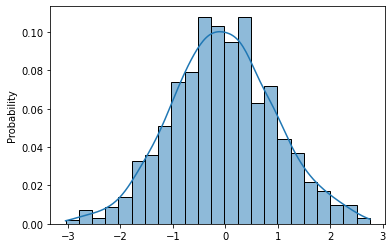

In [39]:
# Filtrando o dataset e vendo seu histograma

np.random.seed(0) # Gera a semente aleatória
normal_points = np.random.normal(0,1,10**3) # gera 10**3 pontos dentro de uma distribuição normal
sns.histplot(x= normal_points,kde=True,stat='probability') # Plota a distripuição dos dados

k2, p = stats.normaltest(normal_points) # Realiza o teste normal
alpha = 1e-3 # Probabilidade limite - caso o p (probabilidade do teste ser verdade) for menor que esse valor, então a hipótese nula pode ser rejeitada


print("p = {:g}".format(p))
#p = 0.890035
if p < alpha:  # H0: os dados seguem uma distribuição normal
    print("H0 pode ser rejeitado")
else:
    print("H0 não pode ser rejeitado")

p = 9.06882e-88
H0 pode ser rejeitado


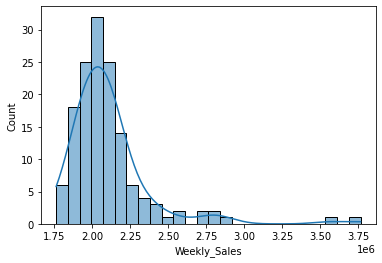

In [41]:
sns.histplot(data=df[df['Store']==20],x='Weekly_Sales',kde=True)

k2, p = stats.normaltest(df.Weekly_Sales)
print("p = {:g}".format(p))
if p < alpha:  # H0: os dados seguem uma distribuição normal
    print("H0 pode ser rejeitado")
else:
    print("H0 não pode ser rejeitado")

<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





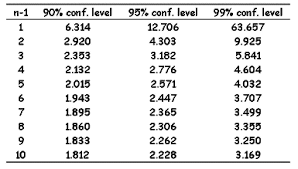

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [47]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T
amostra = df[df['Store']==20].sample(25, random_state=0)
confidence = 0.95
dof = amostra.shape[0]-1

interval = stats.t.interval(alpha=confidence, df=dof, loc=amostra.Weekly_Sales.mean(), scale = stats.sem(amostra.Weekly_Sales))
interval

(2028917.2499684282, 2255093.4844315723)

In [48]:
# Verificando a média da população
df[df['Store']==20].Weekly_Sales.mean()

2107676.8703496507

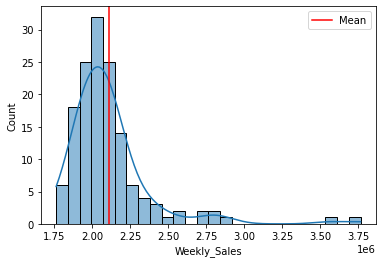

In [51]:
# Visualizando a distribuição dos dados como ele são
sns.histplot(data=df[df['Store']==20],x='Weekly_Sales',kde=True)
plt.axvline(df[df['Store']==20].Weekly_Sales.mean(),0, 40,c='Red', label='Mean')
plt.legend()

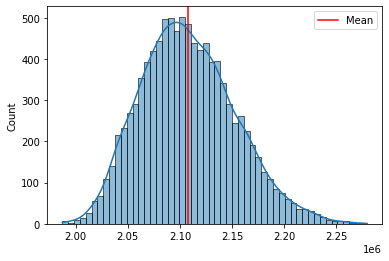

In [52]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central
val_list = []
for i in range(10000):
  val_list.append(df[df['Store']==20].sample(30).Weekly_Sales.mean())

sns.histplot(val_list,kde=True)
plt.axvline(np.array(val_list).mean(),0, 40,c='Red', label='Mean')
plt.legend()

In [53]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal
amostra = df[df['Store']==20].sample(50, random_state=0)
confidence = 0.95

interval = stats.norm.interval(alpha=confidence, loc=amostra.Weekly_Sales.mean(), scale = stats.sem(amostra.Weekly_Sales))
interval


(2071485.9996257257, 2210783.6619742736)

In [54]:
# Verificando a média da população
df[df['Store']==20].Weekly_Sales.mean()

2107676.8703496507